<a href="https://colab.research.google.com/github/Niharikaasopa/OIBSIP/blob/main/Unemployment_Analysis_(Dataset_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK - 2**

***UNEMPLOYMENT ANALYSIS WITH PYTHON***

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Unemployment in India.csv']))
print(df)

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Praticipation Rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
df["Region"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [ ]:
df = df.rename(columns={df.columns[0]:'State',df.columns[3]:'Estimated Unemployment Rate',df.columns[4]:'Estimated Employed', df.columns[5]:'Estimated Labour Participation Rate', df.columns[6]:'Region'})
df.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


<Axes: >

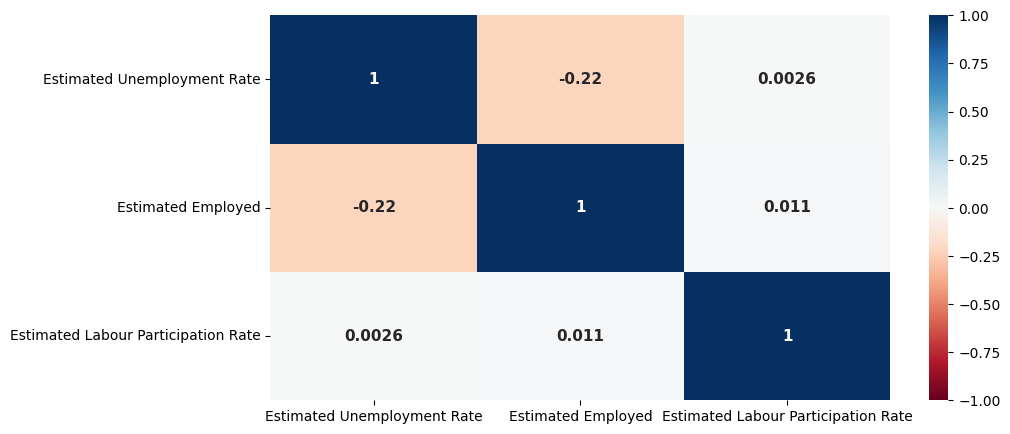

In [ ]:
heat_maps = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,5))
sns.heatmap(heat_maps, cmap='RdBu', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'})

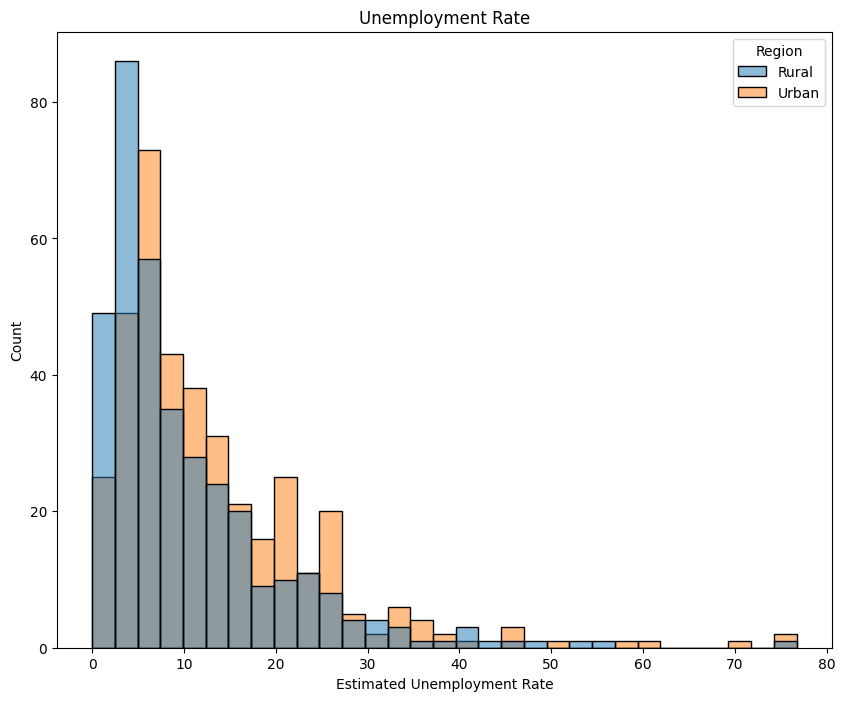

In [ ]:
df.columns= ["State","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Praticipation Rate","Region"]

plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=df)
plt.show()

In [ ]:
Unemployment = df[["State", "Region", "Estimated Unemployment Rate"]]
unemplo = Unemployment.groupby(['Region','State'])['Estimated Unemployment Rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region','State'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Plasma',title= 'Unemployment rate in each region and state',
                  height=650)
fig.show()

In [ ]:
fig = px.bar(df, x='Region',y='Estimated Unemployment Rate',
            title='Unemployment rate across region', height=400)

fig.show()